In [1]:
import pandas as pd
import requests
import xml.etree.ElementTree as ET
from tqdm import tqdm

In [2]:
def read_pmids_from_file(filename):
    """
    Reads PubMed IDs from a file and returns them as a list.
    """
    with open(filename, 'r') as file:
        pmids = [line.strip() for line in file]
    return pmids

pmids = read_pmids_from_file('pmids.txt')

In [3]:
len(pmids)

419883

In [4]:
def splitList(input,chunkSize):
    return [input[i:i+chunkSize] for i in range(0,len(input),chunkSize)]

In [5]:
for i in range(5):
    if i == 1:
        continue
    print(i)

0
2
3
4


In [ ]:
outputDf = pd.DataFrame(columns=['PMID','TITLE','YEAR','ABSTRACT'])
PMIDS = []
TITLES = []
YEARS = []
ABSTRACTS = []
pmids = splitList(pmids,100)
for id in tqdm(pmids):
    api_key = '<enter your NCBI API key here>'
    params = {
        'db': 'pubmed',
        'id': id,
        'retmode': 'xml',
        'api_key':api_key
    }
    base_url = 'https://eutils.ncbi.nlm.nih.gov/entrez/eutils/efetch.fcgi?'
    response = requests.get(base_url, params)
    root = ET.fromstring(response.content)
    indx = ET.tostring(root, encoding='unicode')
    if response.status_code == 200:
        articles = root.findall('.//PubmedArticle')
        for article in articles:
            pmid = article.findall('.//PMID')
            # if only one pmid in the article
            PMIDS.append(pmid[0].text)
            try:
                date = article.findall('.//DateCompleted')
                #print(date)
                date = date[0]
                year = date.findall('.//Year')
                YEARS.append(year[0].text)
            except:
                year = None
                YEARS.append(year)
            
            title = article.findall('.//ArticleTitle')
            TITLES.append(title[0].text)
            abstract = article.findall('.//Abstract')
            if len(abstract)==0:
                ABSTRACTS.append('No abstract available')
            else:
                #print(abstract)
                abstract = abstract[0]
                abstractText = abstract.findall('.//AbstractText')
                if len(abstractText) >1:
                    #if multiple abstract sections
                    abText = []
                    for abstracttext in abstractText:
                        try:
                            label = abstracttext.get('Label')
                            if label is not None:
                                abText.append(str(label+':'+abstracttext.text))
                            else:
                                abText.append(abstracttext.text)
                        except:
                            abText.append('')
                    outputText = ''.join(abText)
                    ABSTRACTS.append(str(outputText))
                else:
                    # if only one abstract section
                    #print(abstractText)
                    ABSTRACTS.append(str(abstractText[0].text))                
    else:
        print(indx)

100%|██████████| 4199/4199 [42:38<00:00,  1.64it/s]  


In [7]:
print(len(PMIDS))
print(len(YEARS))
print(len(TITLES))
print(len(ABSTRACTS))

419709
419709
419709
419709


In [8]:
outputDf['PMID'] = PMIDS
outputDf['TITLE'] = TITLES
outputDf['YEAR'] = YEARS
outputDf['ABSTRACT'] = ABSTRACTS

In [9]:
outputDf.head(10)

,PMID,TITLE,YEAR,ABSTRACT
0,214,Multiple endocrine adenomatosis-I and II.,1976,No abstract available
1,578,"Crassin acetate, the principal antineoplastic ...",1976,"Crassin acetate, a lactonic cembrane diterpene..."
2,2559,Comparison between two antibody populations in...,1976,EBV-neutralizing antibody titers were determin...
3,3102,Multiple endocrine adenomatosis syndromes.,1976,MEA I and II are two genetically distinct tumo...
4,3632,Sudden hemorrhage in metastatic thyroid carcin...,1976,A patient with papillary--follicular carcinoma...
5,5566,Lethal midline granuloma: a pathological spect...,1976,Lethal midline granuloma is a non-specific cli...
6,7062,[Bacteriological findings in materials from pa...,1976,The results of bacteriological studies made be...
7,7818,[Our experience with the use of the double-con...,1976,No abstract available
8,7958,Multiple gastric polyps and parathyroid adenom...,1976,Two cases of multiple gastric polyps associate...
9,8309,Amino acid metabolizing enzymes in rat submaxi...,1976,"The activities of 12 enzymes, many related to ..."


In [10]:
outputDf.to_csv('Data/head and neck cancer query abstracts.csv')

In [11]:
outputDf

,PMID,TITLE,YEAR,ABSTRACT
0,214,Multiple endocrine adenomatosis-I and II.,1976,No abstract available
1,578,"Crassin acetate, the principal antineoplastic ...",1976,"Crassin acetate, a lactonic cembrane diterpene..."
2,2559,Comparison between two antibody populations in...,1976,EBV-neutralizing antibody titers were determin...
3,3102,Multiple endocrine adenomatosis syndromes.,1976,MEA I and II are two genetically distinct tumo...
4,3632,Sudden hemorrhage in metastatic thyroid carcin...,1976,A patient with papillary--follicular carcinoma...
...,...,...,...,...
419704,40423500,Robotic Harvest of the Free Ileocolon Flap for...,2025,"The ileocolon flap is a fully autologous, sing..."
419705,40423684,The Relationship Between Serum Levels of Thyro...,2025,OBJECTIVE:Thyroid Autoantibodies (TgAbs) are a...
419706,40423734,Optimization of oncological care: proposal for...,None,No abstract available
419707,40423817,"Balancing barriers: Family, career, and gender...",None,PURPOSE:There is an urgent need to recruit and...


In [12]:
outputDf[outputDf['YEAR'] > '2020']

,PMID,TITLE,YEAR,ABSTRACT
241945,22934258,CD26 expression and adenosine deaminase activi...,2021,Adenosine deaminase (ADA) is responsible for t...
252350,23894716,Immunotherapy of HPV-associated head and neck ...,2021,Various arguments support the development of a...
252351,23894722,TLR3 agonists improve the immunostimulatory po...,2021,Toll-like receptor 3 (TLR3) agonists have been...
259199,24575385,The immune response in HPV,2021,Although human papillomavirus (HPV)
260224,24666972,Relationship of the recurrent laryngeal nerve ...,2024,DESIGN:The relationship of the recurrent laryn...
...,...,...,...,...
419700,40422545,Tegafur-Uracil Maintenance Therapy in Non-Meta...,2025,"BACKGROUND:Tegafur-uracil (UFT), an oral fluor..."
419703,40423259,Time-Intensity Curve Analysis of Contrast-Enha...,2025,None
419704,40423500,Robotic Harvest of the Free Ileocolon Flap for...,2025,"The ileocolon flap is a fully autologous, sing..."
419705,40423684,The Relationship Between Serum Levels of Thyro...,2025,OBJECTIVE:Thyroid Autoantibodies (TgAbs) are a...


### Data viewing

In [13]:
outputDf = pd.read_csv('Data/head and neck cancer query abstracts.csv')

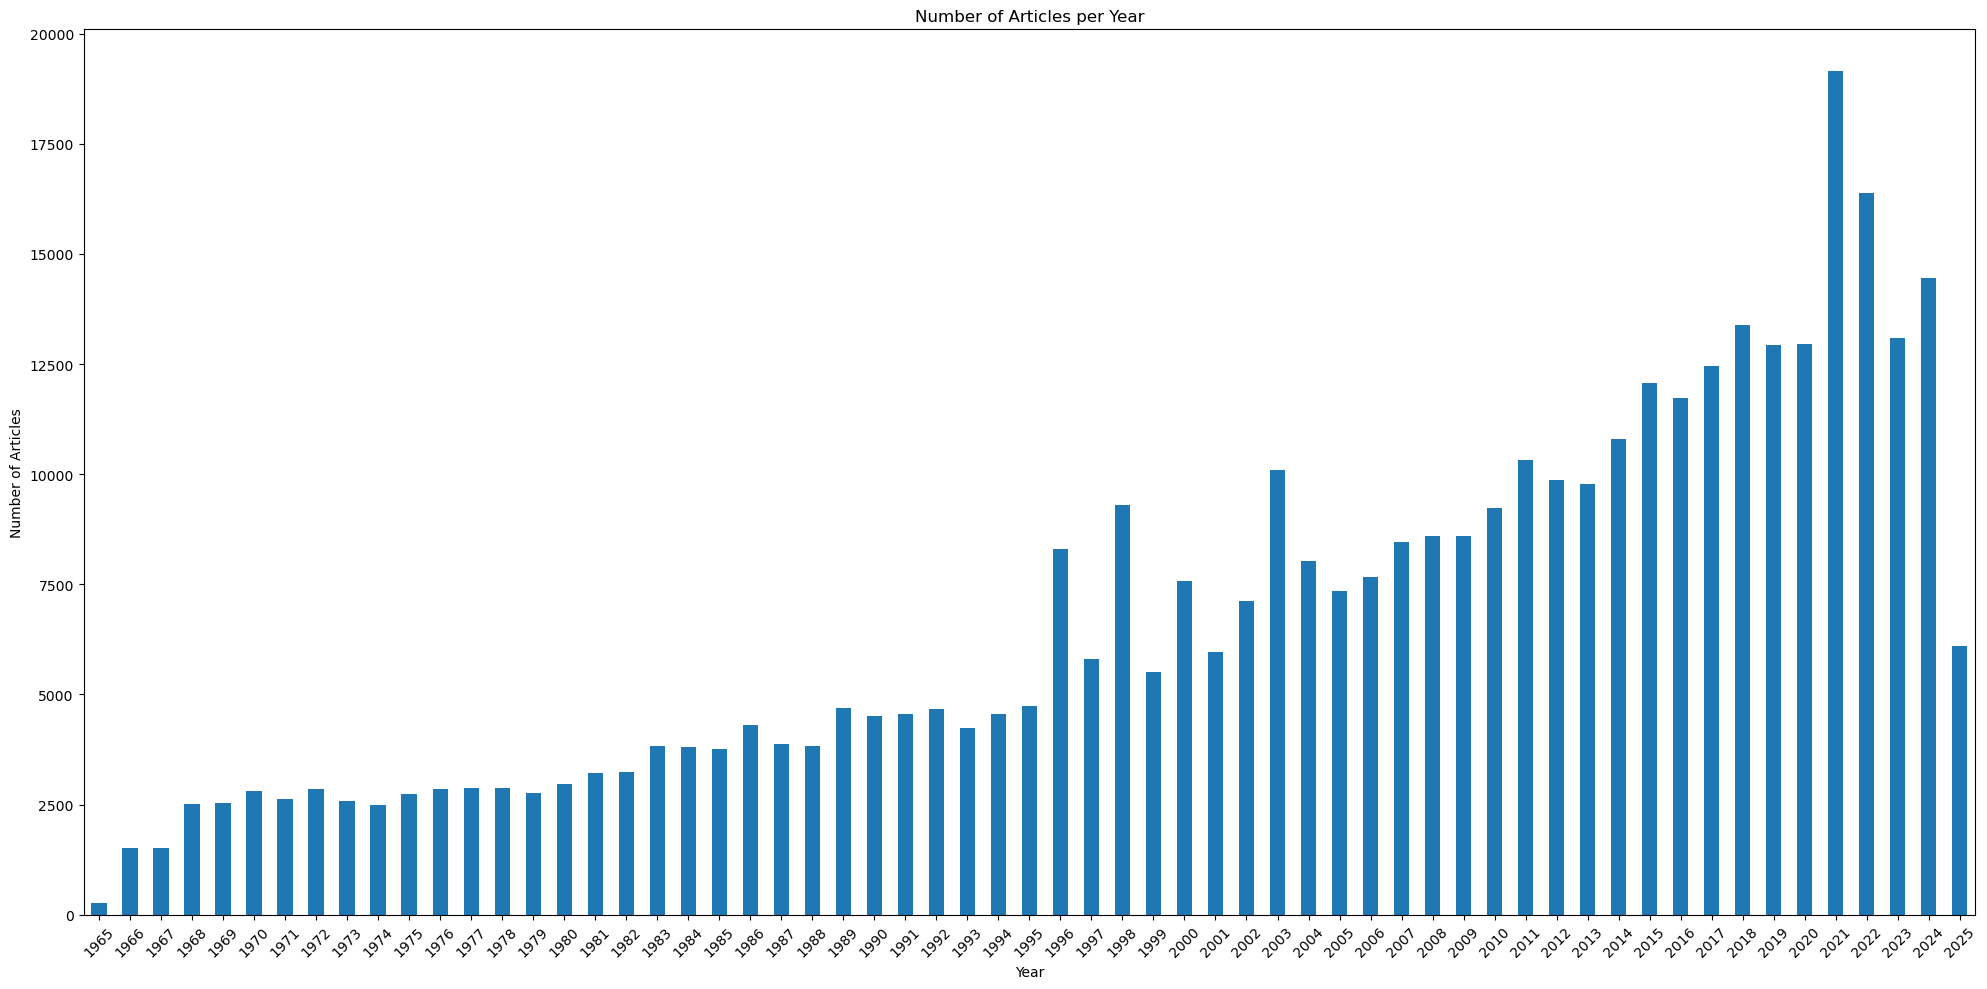

In [14]:
### plot visualization of the number of articles per year, want my years to not be decimal
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
### ensure the year column does not have non-finite values or NA
outputDf['YEAR'] = pd.to_numeric(outputDf['YEAR'], errors='coerce')
outputDf['YEAR'] = outputDf['YEAR'].fillna(0)  # Fill NaN with 0
outputDf['YEAR'] = outputDf['YEAR'].astype(int)
outputDf['YEAR'] = outputDf['YEAR'].astype(str)
# Plotting the number of articles per year
plt.figure(figsize=(20, 10))
### Count the number of articles per year and plot
### drop the year column that is 0
outputDf_graph = outputDf[outputDf['YEAR'] != '0']
outputDf_graph['YEAR'].value_counts().sort_index().plot(kind='bar')
plt.title('Number of Articles per Year')
plt.xlabel('Year')
plt.ylabel('Number of Articles')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

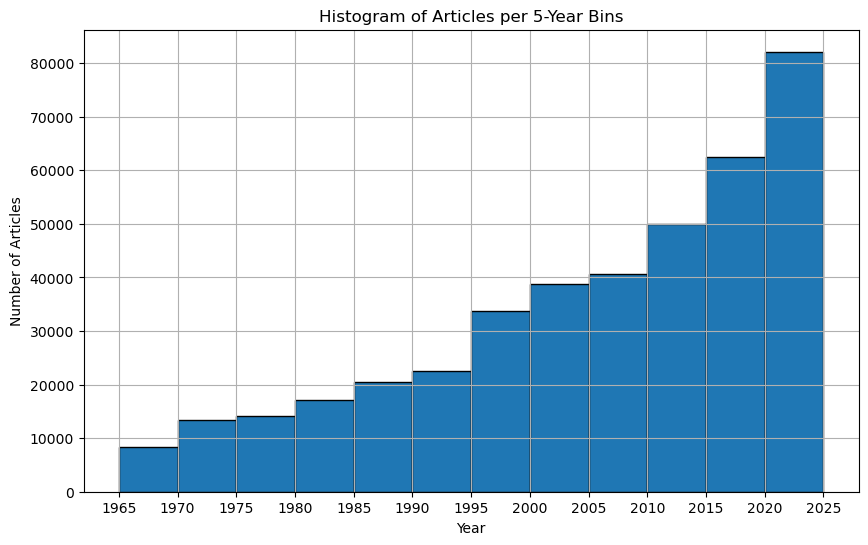

In [15]:
### plot histogram of the number of articles per year, increment into 5 year bins
outputDf['YEAR'] = pd.to_numeric(outputDf['YEAR'], errors='coerce')
outputDf['YEAR'].dropna(inplace=True)
plt.figure(figsize=(10, 6))
outputDf['YEAR'].hist(bins=range(1965, 2030, 5), edgecolor='black')
plt.title('Histogram of Articles per 5-Year Bins')
plt.xlabel('Year')
plt.ylabel('Number of Articles')
plt.xticks(range(1965, 2030, 5))
plt.show()

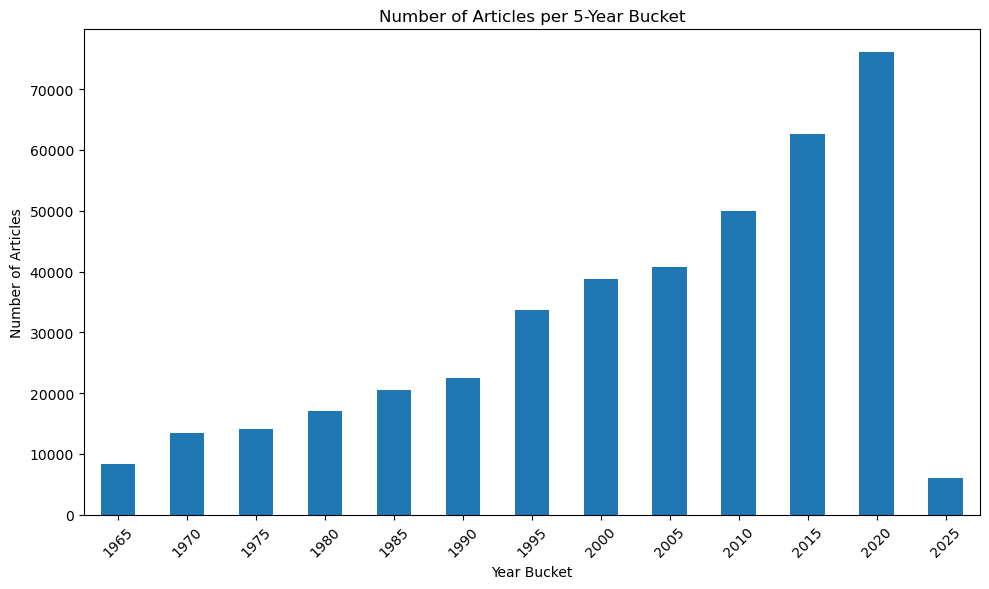

In [16]:
### bucket the years into increments of 5 years
outputDf['YEAR_BUCKET'] = (outputDf['YEAR'] // 5) * 5
outputDf['YEAR_BUCKET'] = outputDf['YEAR_BUCKET'].fillna(-1).astype(int)
outputDf['YEAR_BUCKET'] = outputDf['YEAR_BUCKET'].astype(int)
plt.figure(figsize=(10, 6))
outputDf_graph = outputDf[(outputDf['YEAR_BUCKET'] != -1) & (outputDf['YEAR_BUCKET'] != 0)]
outputDf_graph['YEAR_BUCKET'].value_counts().sort_index().plot(kind='bar')
plt.title('Number of Articles per 5-Year Bucket')
plt.xlabel('Year Bucket')
plt.ylabel('Number of Articles')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [17]:
### percentage of articles after year 2000
outputDf['YEAR'] = pd.to_numeric(outputDf['YEAR'], errors='coerce')
percentage_after_2000 = (outputDf[outputDf['YEAR'] > 2000].shape[0] / outputDf.shape[0]) * 100
print(f"Percentage of articles after year 2000: {percentage_after_2000:.2f}%")

Percentage of articles after year 2000: 63.52%
